(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Dataset

In [49]:
from sklearn import datasets

In [50]:
iris = datasets.load_iris()

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
# print(data.DESCR)
iris.data.shape

(150, 4)

In [55]:
import pandas as pd
df_iris = pd.Series(iris.target)
df_iris.value_counts()

2    50
1    50
0    50
dtype: int64

In [56]:
iris.target.shape

(150,)

In [66]:
X, Y = datasets.make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=2.0, random_state=1)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

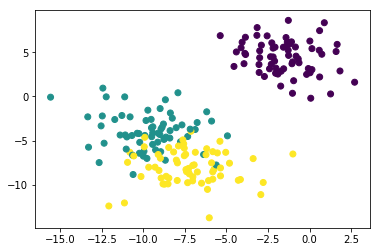

In [68]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [12]:
# datasets.fetch

In [13]:
# load_, fetch_, make_

In [14]:
# Excercise: create visualize the above given data, see how the cluster is spread out.

# Feature extraction

In [15]:
from sklearn import feature_extraction

In [69]:
feature_extraction.DictVectorizer?

In [17]:
# Feature extraction is very different from Feature selection: 
# the former consists in transforming arbitrary data, such as text or images, into numerical features.
# The latter is a machine learning technique applied on these features.

In [70]:
measurements = [
...     {'city': 'Dubai', 'temperature': 33.},
...     {'city': 'London', 'temperature': 12.},
...     {'city': 'San Francisco', 'temperature': 18.}]

vec = feature_extraction.DictVectorizer()

vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

In [71]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

In [20]:
# Text feature extraction
fe_dv = feature_extraction.DictVectorizer()

In [21]:
data = [
    {'today': 1, 'is': 1, 'good': 1, 'day': 1},
#    {'today': 1, 'is': 1, 'good': 1, 'day': 1, 'today': 1},
    {'tomorrow': 1, 'is': 1, 'good': 1, 'day': 1},
    {'yesterday': 1, 'is': 1, 'good': 1, 'day': 1}
]

In [72]:
fe_dv.fit(data)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=True)

In [73]:
print(fe_dv.get_feature_names())

['day', 'good', 'is', 'today', 'tomorrow', 'yesterday']


In [74]:
fe_dv.transform(data).toarray()

array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0., 1.]])

In [25]:
# CountVectorizer, TfidfVectorizer, HashingVectorizer

In [26]:
text = ''' In interviews, victims across the United States described in heart-wrenching detail how their lives had been upended by the abuse. Children, raped by relatives and strangers alike, being told it was normal. Adults, now years removed from their abuse, still living in fear of being recognized from photos and videos on the internet. And parents of the abused, struggling to cope with the guilt of not having prevented it and their powerlessness over stopping its online spread. '''

In [27]:
t1 = 'data scientist needs to works with other scientist'
t5 = 'statistics needs to learn data science'
t2 = 'data scientist needs to learn computer science'
t3 = 'data scientist needs to learn business'
t4 = 'data scientist needs to know chemistry'

In [82]:
#fe_cv = feature_extraction.text.CountVectorizer(ngram_range=(1,1))
fe_cv = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2))

In [83]:
fe_cv.fit([t1, t2,t3, t4, t5])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [84]:
fe_cv.vocabulary_

{'data': 3,
 'scientist': 9,
 'needs': 6,
 'to': 11,
 'works': 13,
 'with': 12,
 'other': 7,
 'learn': 5,
 'computer': 2,
 'science': 8,
 'business': 0,
 'know': 4,
 'chemistry': 1,
 'statistics': 10}

In [85]:
print(fe_cv.get_feature_names())

['business', 'chemistry', 'computer', 'data', 'know', 'learn', 'needs', 'other', 'science', 'scientist', 'statistics', 'to', 'with', 'works']


In [86]:
fe_cv.transform([t1, t5, t2,t3, t4]).toarray().round(2)

array([[0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]])

In [32]:
fe_cv.vocabulary_

{'data': 3,
 'scientist': 9,
 'needs': 6,
 'to': 11,
 'works': 13,
 'with': 12,
 'other': 7,
 'learn': 5,
 'computer': 2,
 'science': 8,
 'business': 0,
 'know': 4,
 'chemistry': 1,
 'statistics': 10}

In [33]:
# Exercise: try the TF-IDF, identify the difference & reason

# Feature selection

In [34]:
## varience-based

## correlation-based

## model-based
## -- partially
## -- complete
# Regression - coefficient 

# Model Random Forest
# 100M point + 10K features
# 1M point + 10K features -> 1K feature 
# 100M point + 1K features -> real model 

In [35]:
from sklearn import feature_selection

In [36]:
fs_vt = feature_selection.VarianceThreshold(threshold=0.01)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


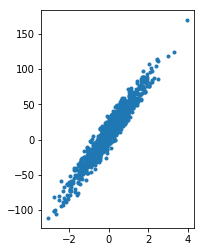

In [89]:
rgdata = datasets.make_regression(
    n_samples=1000, n_features=1, n_informative=1, 
    n_targets=1, bias=10.0, effective_rank=None, 
    tail_strength=0.5, noise=10.0, shuffle=True, 
    coef=True, random_state=1)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(rgdata[0][:,0], rgdata[1], '.')
fig.show()

In [90]:
X = rgdata[0]
Y = rgdata[1]

In [91]:
import numpy as np

In [92]:
Xnew = np.hstack([X, np.zeros([X.shape[0], 1])])
Xnew[1,1] = 1
Xnew.shape

(1000, 2)

In [94]:
fs_vt.fit_transform(Xnew).shape

(1000, 1)

In [42]:
fs_vt.variances_

array([0.96236911, 0.000999  ])

In [111]:
# GenericUnivariateSelect
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2

X, y = load_breast_cancer(return_X_y=True)

In [112]:
X.shape

(569, 30)

In [97]:
transformer = GenericUnivariateSelect(chi2, 'k_best', param=20)
X_new = transformer.fit_transform(X, y)

In [98]:
X_new.shape

(569, 20)

# Learning algorithm

In [42]:
# Application levels

# Regression

# Classification

# Dimension reduction

# Clustering

# Outlier detection

In [43]:
# focus on dummy regressor & linear regression first

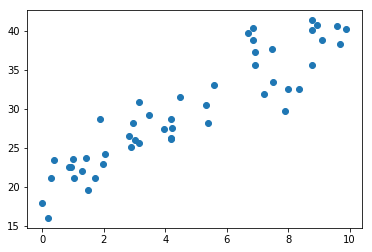

In [113]:
np.random.seed(1)
X = np.random.random([50,1]).ravel() * 10
Y = X * 2 + 20 + 3 * np.random.randn(50)
plt.scatter(X,Y)

In [115]:
print(X.shape, X.reshape(-1,1).shape)

(50,) (50, 1)


In [106]:
from sklearn import linear_model

In [107]:
lm_lr = linear_model.LinearRegression()

In [108]:
lm_lr.fit(X.reshape(-1,1), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
Ypred = lm_lr.predict(X.reshape(-1,1))

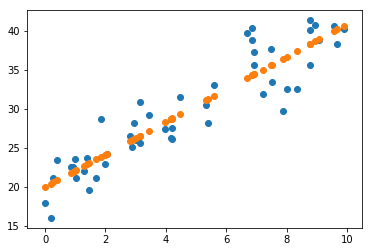

In [110]:
plt.scatter(X,Y)
plt.scatter(X,Ypred)

In [116]:
lm_lr.intercept_

20.004268743340383

In [117]:
lm_lr.coef_

array([2.08162643])

In [296]:
# Exercise: devise a way to get the uncertainty out of the regression

# Model evaluation

In [119]:
from sklearn import metrics

In [120]:
metrics.regression.mean_squared_error(Y, Ypred)

7.365049713239557

In [121]:
metrics.regression.r2_score(Y, Ypred)

0.8457521222978522

In [122]:
metrics.explained_variance_score(Y, Ypred)

0.8457521222978522

In [56]:
# regression
# rmse

In [57]:
# classification
# auc 

In [124]:
# r2_score vs. explained_varience_ratio
metrics.regression.r2_score?
metrics.explained_variance_score?

# Model selection

In [125]:
from sklearn import model_selection

In [126]:
Ypred = model_selection.cross_val_predict(lm_lr, X.reshape(-1,1), Y)

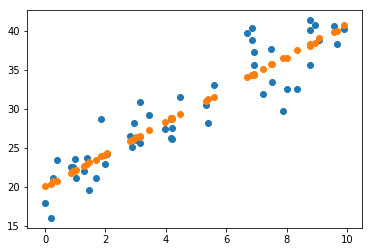

In [127]:
plt.scatter(X,Y)
plt.scatter(X,Ypred)

In [128]:
metrics.regression.mean_squared_error(Y, Ypred)

7.409953508756464

In [304]:
model_selection.cross_val_predict?
model_selection.cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')>

In [181]:
# or manually specify the fold
# directly fold or split
# stratified fold or split
# label fold or split

In [182]:
# Iris data as example

In [183]:
# GridSearch & RandomizedSearch

# Production pipeline

In [129]:
from sklearn import pipeline

In [130]:
pipeline.Pipeline?